In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/BD HS'
import pandas as pd
import numpy as np
train = pd.read_csv(path+'/train.csv')
val = pd.read_csv(path+'/val.csv')
test = pd.read_csv(path+'/test.csv')
#train=train.drop(['target','type'],axis=1)
#val=val.drop(['target','type'],axis=1)
#test=test.drop(['target','type'],axis=1)

In [ ]:
import tokenization
import tensorflow as tf
import tensorflow_hub as hub
from keras.utils import to_categorical
from sklearn import preprocessing


In [ ]:
print(df_train)

                                                sentence  target  \
0                             .... ঐ ইন্দুর তোই মরছ নাই?     ind   
1      #গেবনের শেষে আইসা আপনার মুখোশ টা খুলছে এতেই আম...     ind   
2            ✈✈✈✈��� মুরগি চোরের পাছায় ডুকবি আর মারবি।।।     ind   
3      ১৮ কোটির চোদা খাওয়া শেষে এখন ১৫০কোটির চোদা খাব...  female   
4                          ২য় মীর জাফরের মুখে মুতে দে...    male   
...                                                  ...     ...   
45247  হে বাংলার সাহসী সেনাবাহিনীরা তোমরা কি এখনো ঘুম...     NaN   
45248  হেআল্লাহ সব তোমাৰ হাতেতুমি ৰক্ষা কৰবেএবংহাজাৰ ...     NaN   
45249                             হ্যা এই মেয়ে লাইভে আসো     NaN   
45250  হ্যািপ ঠিক কাজ করেছে।এই মত আমি জীবনে ভালোবাসা ...     NaN   
45251                           �দেওয়ানবাগির গুলা দিসে �     NaN   

                 type  hate speech  
0      callToViolence            1  
1      callToViolence            1  
2      callToViolence            1  
3      callToViolence            1 

In [ ]:
print('No of hate comments in train : ',len(df_train[df_train['hate speech']==1]))
print('No of Non-hate comments in train : ',len(df_train[df_train['hate speech']==0]))
print('No of hate comments in test : ',len(df_test[df_test['hate speech']==1]))
print('No of Non-hate comments in test : ',len(df_test[df_test['hate speech']==0]))

No of hate comments in train :  21740
No of Non-hate comments in train :  23512
No of hate comments in test :  2416
No of Non-hate comments in test :  2613


In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize 
from wordcloud import WordCloud
stop_words = set(stopwords.words("bengali"))
stop_words.remove('নেই')
stop_words.remove('নাই')
l=[]
l2=[]
print(stop_words)
def clean_text(df):
    all_comments = list()
    lines = df.sentence.values.tolist()
    for text in lines:

        pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        text = pattern.sub('', text)

        emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" #emotions
                           u"\U0001F300-\U0001F5FF" #sumbols and pictographs
                           u"\U0001F680-\U0001F6FF" #transport and map symbols
                           u"\U0001F1E0-\U0001F1FF" #flags
                           u"\U00002702-\U000027B0"  
                           u"\U000024C2-\U0001F251" 
                           "]+",flags = re.UNICODE)
        text=emoji_pattern.sub('',text)

        # removing #mentions
        text = re.sub(r"@+","", text)
        
        text = re.sub(r"[!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~।ঃ\t\n]", "", text) # removing punctuations
        tokens = word_tokenize(text)
        l.extend(tokens)
        #stop_words = set(stopwords.words("bengali"))
  
        words = [w for w in tokens if not w in stop_words] # removing stop words
        words = ' '.join(words)
        all_comments.append(words)
        
    return all_comments

all_comments = clean_text(df_train)
df_train['process_speech'] = all_comments
train_x = df_train['process_speech'].to_list()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'প্রযন্ত', 'ঠিক', 'তাকে', 'দেখা', 'ব্যবহার', 'আজ', 'দুই', 'নিজেই', 'মাত্র', 'সহ', 'জানানো', 'ব্যাপারে', 'কী', 'আদ্যভাগে', 'প্রতি', 'ওর', 'মনে', 'দিয়েছে', 'যখন', 'নয়', 'প্রায়', 'শুধু', 'আগামী', 'থাকে', 'হইতে', 'তথা', 'ফিরে', 'এল', 'করলে', 'দু', 'জনকে', 'তাঁরা', 'সেই', 'পারে', 'তো', 'দেন', 'দিকে', 'সঙ্গে', 'দুটি', 'এসে', 'তখন', 'করেছে', 'তুমি', 'গেলে', 'যাচ্ছে', 'করিয়ে', 'সেটাও', 'বসে', 'ওদের', 'দিয়েছেন', 'বিভিন্ন', 'পরে', 'বললেন', 'রকম', 'তাদের', 'কোন', 'হয়েই', 'বিনা', 'হতে', 'গোটা', 'হবে', 'মধ্যেও', 'নাগাদ', 'একবার', 'ধামার', 'উপরে', 'হয়েছে', 'হয়ে', 'একে', 'জানতে', 'অন্তত', 'তিনিও', 'যাবে', 'এক্', 'ছাড়াও', 'কোটি', 'যাওয়ার', 'কখনও', 'পি', 'বরং', 'এস', 'প্রভৃতি', 'এমন', 'কত', 'দিয়ে', 'তিনি', 'কিছু', 'পরেও', 'স্বয়ং', 'তবু', 'এমনি', 'তারৈ', 'করার', 'জ্নজন', 'সে', 'কমনে', 'অনেকেই', 'তুলে', 'পাওয়া', 'কিংবা', 'কারও', 'গুলি', 'যেতে', 'অনুযায়ী', 'হল', 'করিতে', 'যেমন', 'কাজে', 'যাঁরা', 'কয়েক', 'চেয়ে', 'তাও', 'আর', 'জানিয়েছে', 'হলে', 'বার', 'আগে', 'মতোই', 'যেখানে', 'তত', 'হওয়ার',

In [ ]:
from collections import Counter  
def count_before(l):
  counter = Counter(l)
  most_occur = counter.most_common(50)
  print(most_occur)

In [ ]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud
def wc(l):
  print(type(l))
  refined_sentence = " ".join(l)
  regex = r"[\u0980-\u09FF]+"
  wc = WordCloud(width=800, height=400,mode="RGBA",background_color=None,colormap="hsv",   stopwords = stop_words,
  font_path="kalpurush.ttf",regexp=regex).generate(refined_sentence)
  plt.figure(figsize=(15, 7))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.show()
  result = wc.to_file("Bengali_word_cloud.png")

[('না', 9181), ('এই', 7070), ('করে', 5392), ('কি', 5349), ('আর', 4996), ('কে', 4418), ('আমি', 3236), ('একটা', 3142), ('কথা', 2872), ('আমার', 2751), ('ও', 2668), ('যে', 2478), ('হবে', 2461), ('তুই', 2449), ('তো', 2357), ('তোর', 2351), ('সব', 2297), ('ভাই', 2282), ('ভালো', 2282), ('জন্য', 2256), ('এর', 2240), ('তার', 2212), ('হয়', 2164), ('চাই', 2092), ('থেকে', 2046), ('কোন', 1992), ('আছে', 1930), ('সাথে', 1927), ('নাই', 1900), ('বাচ্চা', 1858), ('মানুষ', 1831), ('অনেক', 1829), ('করা', 1800), ('কিছু', 1786), ('মনে', 1691), ('দিয়ে', 1655), ('উচিত', 1583), ('কেন', 1543), ('করতে', 1540), ('দরকার', 1509), ('যদি', 1481), ('এক', 1478), ('আপনার', 1458), ('বলে', 1432), ('আল্লাহ', 1390), ('এটা', 1388), ('আপনি', 1375), ('নিয়ে', 1369), ('টা', 1318), ('আমরা', 1298)]
<class 'list'>


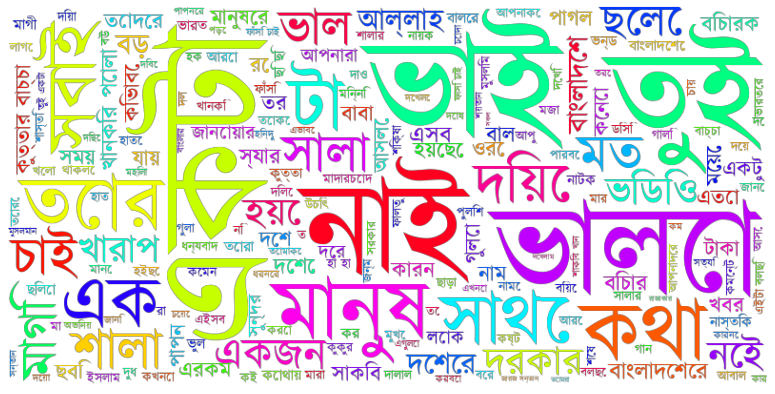

In [ ]:
count_before(l)
wc(l)

In [ ]:
print(train_x[0:10])

['ইন্দুর তোই মরছ নাই', 'গেবনের শেষে আইসা মুখোশ টা খুলছে এতেই মহাখুশী হ হ বমি দেখলে মূত্রত্যাগেই আপনাকে দিব গু দক্ষিনা', 'মুরগি চোরের পাছায় ডুকবি মারবি', '১৮ কোটির চোদা খাওয়া শেষে ১৫০কোটির চোদা খাবে মিথিলা', '২য় মীর জাফরের মুখে মুতে দে', 'অই কখানকি সত্যি জানছ তরে জুদি পাইতাম তর বোদার খারাইয়া মুত্তাম', 'অই জারছি পরা লোক টা পাইলে কোত্তার পিটাইতাম', 'অকে পিথিবির আলো দেখানোর মেরে ফেলা দরকার', 'অকে মেরে ফেলতে', 'অগরে চুদে মেয়ে গূলোকে']


In [ ]:
from sklearn.metrics import classification_report
from sklearn.pipeline import make_union
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

import nltk
nltk.download('punkt')

def token(doc):
  tokens =nltk.word_tokenize(doc)
  return tokens

# word unigram TFIDF vectorizer
u = TfidfVectorizer(strip_accents=None, tokenizer=token, analyzer='word',  ngram_range=(1,1))

# char ngram TFIDF vectorizer
c2345 = TfidfVectorizer(strip_accents=None, tokenizer=token, analyzer='char',  ngram_range=(2,5))

# word unigram + char ngram TFIDF vectorizer
w = TfidfVectorizer(strip_accents=None, tokenizer=token, analyzer='word',  ngram_range=(1,1))
c = TfidfVectorizer(strip_accents=None, tokenizer=token, analyzer='char',  ngram_range=(2,5))
u_c2345 = make_union(w, c, n_jobs=-1)

features = {
    'word unigram':u, 'char ngram':c2345, 'word unigram + char ngram':u_c2345
}

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#data for classifying hatespeech target
df_train2=df_train[df_train['hate speech']==1]
df_train2=df_train2.drop(['hate speech','type'],axis=1)
df_train2.columns
print(len(df_train2))
df_train2=df_train2.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
print(len(df_train2))
df_train2.columns

21740
21740


Index(['sentence', 'target', 'process_speech'], dtype='object')

In [ ]:
#data for classifying hatespeech category
df_train3=df_train[df_train['hate speech']==1]
df_train3=df_train3.drop(['hate speech','target'],axis=1)
df_train3.columns
print(len(df_train3))
df_train3=df_train3.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
print(len(df_train3))
df_train3.columns

21740
21740


Index(['sentence', 'type', 'process_speech'], dtype='object')

[('এই', 4089), ('না', 3848), ('করে', 2551), ('কি', 2490), ('আর', 2336), ('কে', 2223), ('তুই', 2071), ('তোর', 2046), ('একটা', 1849), ('বাচ্চা', 1722), ('মাগি', 1270), ('খানকির', 1269), ('সব', 1182), ('তো', 1180), ('কথা', 1176), ('ও', 1175), ('আমি', 1158), ('কুত্তার', 1130), ('যে', 1099), ('শালা', 1079), ('দরকার', 1044), ('দিয়ে', 1039), ('সালা', 1022), ('উচিত', 1017), ('জুতা', 999), ('এর', 997), ('আমার', 983), ('হবে', 969), ('কোন', 910), ('পোলা', 903), ('নাই', 902), ('হয়', 871), ('মাগির', 845), ('জন্য', 829), ('তার', 824), ('করা', 801), ('থেকে', 799), ('ওর', 781), ('আছে', 780), ('সাথে', 743), ('কেন', 737), ('মানুষ', 737), ('মনে', 734), ('ভালো', 715), ('কিছু', 699), ('চাই', 688), ('করতে', 660), ('ভাই', 637), ('বলে', 633), ('তর', 627)]
<class 'list'>


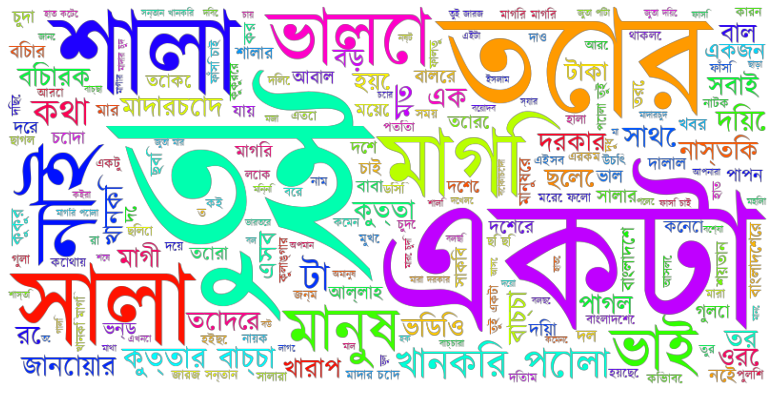

In [ ]:
l=[]
all_comments = clean_text(df_train2)
#df_train['process_speech'] = all_comments
train_x2 = df_train2['process_speech'].to_list()
count_before(l)
wc(l)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['NH', 'HS']
ngram = []
nh_p = []
nh_r = []
nh_f = []
hs_p = []
hs_r = []
hs_f = []
w_p = []
w_r = []
w_f = []
model_names=['SVM','SVM','SVM','Decision Tree','Decision Tree','Decision Tree','Random Forest','Random Forest','Random Forest','Multinomial NB','Multinomial NB','Multinomial NB','KNN','KNN','KNN','Logistic Reg','Logistic Reg','Logistic Reg']
train_x = df_train['process_speech'].to_list()
train_y = df_train['hate speech'].values

test_x = df_test['sentence'].to_list()
test_y = df_test['hate speech'].values
models=[]
model = LinearSVC(penalty='l2', loss='hinge', C=1)
models.append(model)
model = DecisionTreeClassifier(random_state=0)
models.append(model)
model = RandomForestClassifier(random_state=0,max_depth=50)
models.append(model)
model = MultinomialNB()
models.append(model)
model = KNeighborsClassifier(n_neighbors=203)
models.append(model)
model=LogisticRegression(random_state=0)
models.append(model)

acc=[]
def rnd(var):     # used for rounding the final score for readibility perpose
  rounded_var = round(var*100,2)
  return rounded_var
for i in range(len(models)):
  for feature in features.keys():
    vec = features[feature]

    train_vector = vec.fit_transform(train_x)
    test_vector = vec.transform(test_x)

    models[i].fit(train_vector, train_y)
    prediction = models[i].predict(test_vector)

    r = classification_report(test_y, prediction, target_names=target_names, output_dict=True)


    ngram.append(feature)
    acc.append(round(r['accuracy']*100, 2))
    nh_p.append(rnd(r['NH']['precision']))
    nh_r.append(rnd(r['NH']['recall']))
    nh_f.append(rnd(r['NH']['f1-score']))

    hs_p.append(rnd(r['HS']['precision']))
    hs_r.append(rnd(r['HS']['recall']))
    hs_f.append(rnd(r['HS']['f1-score']))

    w_p.append(rnd(r['weighted avg']['precision']))
    w_r.append(rnd(r['weighted avg']['recall']))
    w_f.append(rnd(r['weighted avg']['f1-score']))

result = { 
    'model':model_names,
    'Accuracy':acc,
    'ngram':ngram,
    'NH precision':nh_p, 'NH recall':nh_r, 'NH F1':nh_f,
    'HS precision':hs_p, 'HS recall':hs_r, 'HS F1':hs_f,
    'weighted avg precision':w_p, 'weighted avg recall':w_r, 'weighted avg F1':w_f,
}

df_result = pd.DataFrame(data=result)
df_result

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


,model,Accuracy,ngram,NH precision,NH recall,NH F1,HS precision,HS recall,HS F1,weighted avg precision,weighted avg recall,weighted avg F1
0,SVM,88.01,word unigram,85.56,92.54,88.91,91.15,83.11,86.95,88.25,88.01,87.97
1,SVM,90.89,char ngram,89.63,93.26,91.41,92.38,88.33,90.31,90.95,90.89,90.88
2,SVM,90.81,word unigram + char ngram,90.12,92.46,91.27,91.61,89.03,90.30,90.83,90.81,90.81
3,Decision Tree,83.48,word unigram,82.95,85.84,84.37,84.09,80.92,82.47,83.50,83.48,83.46
4,Decision Tree,86.88,char ngram,87.89,86.68,87.28,85.81,87.09,86.44,86.89,86.88,86.88
5,Decision Tree,86.74,word unigram + char ngram,87.77,86.53,87.15,85.65,86.96,86.30,86.75,86.74,86.74
6,Random Forest,81.89,word unigram,76.41,94.22,84.39,91.64,68.54,78.43,83.73,81.89,81.52
7,Random Forest,86.96,char ngram,82.82,94.49,88.27,92.97,78.81,85.30,87.70,86.96,86.85
8,Random Forest,87.29,word unigram + char ngram,83.34,94.41,88.53,92.94,79.59,85.75,87.96,87.29,87.20
9,Multinomial NB,84.99,word unigram,84.82,86.61,85.70,85.18,83.24,84.20,84.99,84.99,84.98
